<a href="https://colab.research.google.com/github/sirishanarayansa/AI/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/sirishanarayansa/AI/main/winequality-red0.csv

--2021-04-24 15:51:44--  https://raw.githubusercontent.com/sirishanarayansa/AI/main/winequality-red0.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85733 (84K) [text/plain]
Saving to: ‘winequality-red0.csv.2’

winequality-red0.cs 100%[===================>]  83.72K  --.-KB/s    in 0.01s   

2021-04-24 15:51:44 (5.47 MB/s) - ‘winequality-red0.csv.2’ saved [85733/85733]



In [ ]:
import pandas as pd
data = pd.read_csv('winequality-red0.csv', delimiter = ',')

In [ ]:
data.head()

,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
print(data.shape)

(1599, 12)


In [ ]:
import numpy as np
dataset = np.genfromtxt('winequality-red0.csv', delimiter = ',', skip_header = True)

In [ ]:
print(dataset.shape)

(1599, 12)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
np.set_printoptions(formatter = {'float': '{: 0.2f}'.format})

In [ ]:
X = dataset[:,]
Y = dataset[:,-1]

In [ ]:
print(X.shape , Y.shape)

(1599, 12) (1599,)


In [ ]:
print(X)

[[ 7.40  0.70  0.00 ...  0.56  9.40  0.00]
 [ 7.80  0.88  0.00 ...  0.68  9.80  0.00]
 [ 7.80  0.76  0.04 ...  0.65  9.80  0.00]
 ...
 [ 6.30  0.51  0.13 ...  0.75  11.00  1.00]
 [ 5.90  0.65  0.12 ...  0.71  10.20  0.00]
 [ 6.00  0.31  0.47 ...  0.66  11.00  1.00]]


In [ ]:
min = X.min(axis = 0) 
max = X.max(axis = 0) 
X = (X - min) / (max - min)

In [ ]:
print(X[:5])

[[ 0.25  0.40  0.00  0.07  0.11  0.14  0.10  0.57  0.61  0.14  0.15  0.00]
 [ 0.28  0.52  0.00  0.12  0.14  0.34  0.22  0.49  0.36  0.21  0.22  0.00]
 [ 0.28  0.44  0.04  0.10  0.13  0.20  0.17  0.51  0.41  0.19  0.22  0.00]
 [ 0.58  0.11  0.56  0.07  0.11  0.23  0.19  0.58  0.33  0.15  0.22  1.00]
 [ 0.25  0.40  0.00  0.07  0.11  0.14  0.10  0.57  0.61  0.14  0.15  0.00]]


In [ ]:
import random
np.random.shuffle(X)

In [ ]:
print(X[:5])

[[ 0.13  0.14  0.25  0.10  0.10  0.31  0.18  0.46  0.54  0.38  0.34  0.00]
 [ 0.47  0.16  0.55  0.08  0.08  0.06  0.03  0.52  0.41  0.28  0.34  0.00]
 [ 0.70  0.18  0.60  0.12  0.12  0.42  0.23  0.70  0.28  0.24  0.32  0.00]
 [ 0.73  0.16  0.49  0.34  0.09  0.06  0.10  0.83  0.36  0.20  0.55  1.00]
 [ 0.13  0.14  0.25  0.10  0.10  0.31  0.18  0.46  0.54  0.38  0.34  0.00]]


In [ ]:
index_30percent = int(0.3 * len(X[:, 0]))
print(index_30percent)
XVALID = X[:index_30percent, :-1]
YVALID = X[:index_30percent, -1]
XTRAIN = X[index_30percent:, :-1]
YTRAIN = X[index_30percent:, -1]

479


In [ ]:
high = len(YVALID) - sum(YVALID)
print("Baseline accuracy : ",high/len(YVALID))

Baseline accuracy :  0.4759916492693111


In [ ]:
print(XTRAIN)

[[ 0.23  0.27  0.07 ...  0.46  0.29  0.18]
 [ 0.00  0.27  0.15 ...  0.91  0.14  0.72]
 [ 0.22  0.43  0.01 ...  0.51  0.04  0.68]
 ...
 [ 0.23  0.15  0.24 ...  0.55  0.15  0.26]
 [ 0.25  0.26  0.47 ...  0.49  0.14  0.11]
 [ 0.27  0.23  0.11 ...  0.37  0.14  0.25]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model_0 = Sequential()
model_0.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model_0.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
history_0 = model_0.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 1000, batch_size=10)

Epoch 1/1000
112/112 [==============================] - 1s 3ms/step - loss: 0.7144 - accuracy: 0.5180 - val_loss: 0.6892 - val_accuracy: 0.5324
Epoch 2/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5299 - val_loss: 0.6801 - val_accuracy: 0.5511
Epoch 3/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.5478 - val_loss: 0.6738 - val_accuracy: 0.5783
Epoch 4/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.5773 - val_loss: 0.6685 - val_accuracy: 0.5992
Epoch 5/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.5949 - val_loss: 0.6642 - val_accuracy: 0.6159
Epoch 6/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.6148 - val_loss: 0.6604 - val_accuracy: 0.6159
Epoch 7/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.6109 - val_loss: 0.6564 - val_accuracy:

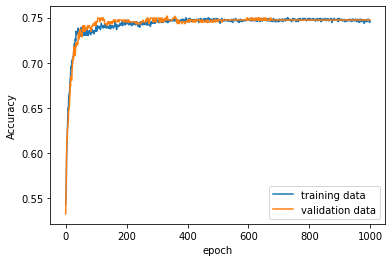

In [ ]:
plt.plot(history_0.history['accuracy'])
plt.plot(history_0.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

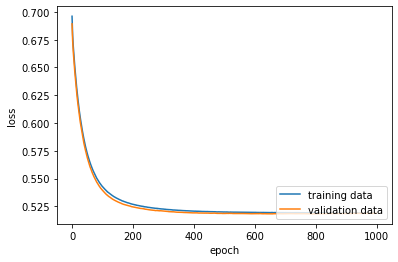

In [ ]:
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
P0 = model_0.predict(XTRAIN)
accuracy_train0 = model_0.evaluate(XTRAIN, YTRAIN)

print(accuracy_train0)

35/35 [==============================] - 0s 2ms/step - loss: 0.5189 - accuracy: 0.7473
[0.5189390182495117, 0.7473214268684387]


In [ ]:
P0 = model_0.predict(XVALID)
accuracy_valid0 = model_0.evaluate(XVALID, YVALID)

print(accuracy_valid0)

15/15 [==============================] - 0s 1ms/step - loss: 0.5190 - accuracy: 0.7474
[0.5189520120620728, 0.7473903894424438]


In [ ]:
from sklearn.metrics import mean_absolute_error as mae
mae(accuracy_train0, accuracy_valid0)

4.0978193283081055e-05

In [ ]:
prediction = model_0.predict(XTRAIN)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
new_accuracy = accuracy_score(YTRAIN, prediction.round())
new_precision = precision_score(YTRAIN , prediction.round())
new_recall = recall_score(YTRAIN , prediction.round())
new_f1 = f1_score(YTRAIN, prediction.round())

print(new_accuracy)
print(new_precision)
print(new_recall)
print(new_f1)

0.7473214285714286
0.7715736040609137
0.7549668874172185
0.7631799163179916


In [ ]:
model_1 = Sequential()
model_1.add(Dense(8, input_dim = len(XTRAIN[0, :]), activation='relu'))
model_1.add(Dense(6, activation='relu'))
model_1.add(Dense(4, activation='relu'))
model_1.add(Dense(4, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

In [ ]:
model_1.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 100, batch_size=10)

Epoch 1/100
112/112 [==============================] - 1s 3ms/step - loss: 0.6940 - accuracy: 0.4811 - val_loss: 0.6914 - val_accuracy: 0.6180
Epoch 2/100
112/112 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5685 - val_loss: 0.6894 - val_accuracy: 0.6075
Epoch 3/100
112/112 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.6288 - val_loss: 0.6861 - val_accuracy: 0.6096
Epoch 4/100
112/112 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.6453 - val_loss: 0.6799 - val_accuracy: 0.6660
Epoch 5/100
112/112 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.6602 - val_loss: 0.6728 - val_accuracy: 0.6701
Epoch 6/100
112/112 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.6722 - val_loss: 0.6639 - val_accuracy: 0.6827
Epoch 7/100
112/112 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.6669 - val_loss: 0.6523 - val_accuracy: 0.6931

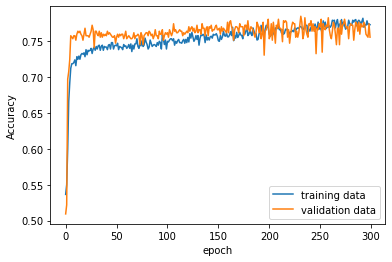

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

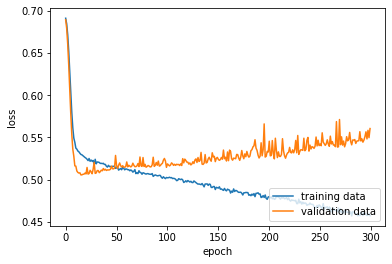

In [ ]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
P0 = model_1.predict(XTRAIN)
accuracy_train = model_1.evaluate(XTRAIN, YTRAIN)

print(accuracy_train)

35/35 [==============================] - 0s 2ms/step - loss: 0.4621 - accuracy: 0.7750
[0.4620613753795624, 0.7749999761581421]


In [ ]:
P0 = model_1.predict(XVALID)
accuracy_valid = model_1.evaluate(XVALID, YVALID)

print(accuracy_valid)

15/15 [==============================] - 0s 1ms/step - loss: 0.5604 - accuracy: 0.7557
[0.5604380369186401, 0.7557411193847656]


In [ ]:
from sklearn.metrics import mean_absolute_error as mae
mae(accuracy_train, accuracy_valid)

0.005200862884521484

In [ ]:
model_2 = Sequential()
model_2.add(Dense(12, input_dim = len(XTRAIN[0, :]), activation='relu'))
model_2.add(Dense(8, activation='relu'))
model_2.add(Dense(4, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
model_2.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=300, batch_size=10)

Epoch 1/300
112/112 [==============================] - 1s 3ms/step - loss: 0.6891 - accuracy: 0.5845 - val_loss: 0.6767 - val_accuracy: 0.6180
Epoch 2/300
112/112 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.6159 - val_loss: 0.6553 - val_accuracy: 0.6973
Epoch 3/300
112/112 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.6623 - val_loss: 0.6345 - val_accuracy: 0.6973
Epoch 4/300
112/112 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.6724 - val_loss: 0.6266 - val_accuracy: 0.6263
Epoch 5/300
112/112 [==============================] - 0s 2ms/step - loss: 0.6090 - accuracy: 0.6921 - val_loss: 0.5994 - val_accuracy: 0.6952
Epoch 6/300
112/112 [==============================] - 0s 2ms/step - loss: 0.5798 - accuracy: 0.7262 - val_loss: 0.5801 - val_accuracy: 0.7370
Epoch 7/300
112/112 [==============================] - 0s 2ms/step - loss: 0.5791 - accuracy: 0.7098 - val_loss: 0.5676 - val_accuracy: 0.7474

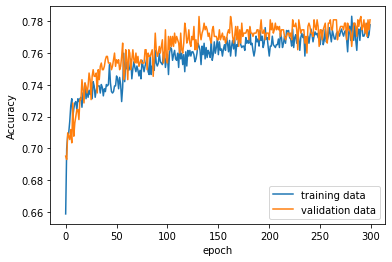

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

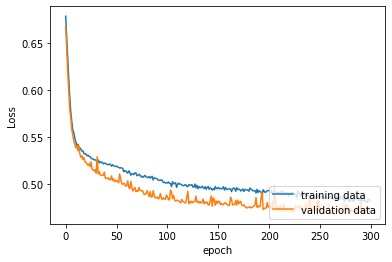

In [ ]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
P2 = model_2.predict(XTRAIN)
accuracy_train = model_2.evaluate(XTRAIN, YTRAIN)

print(accuracy_train)

35/35 [==============================] - 0s 2ms/step - loss: 0.4786 - accuracy: 0.7804
[0.47857666015625, 0.7803571224212646]


In [ ]:
P2 = model_2.predict(XVALID)
accuracy_valid = model_2.evaluate(XVALID, YVALID)

print(accuracy_valid)

15/15 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.7808
[0.47503024339675903, 0.780793309211731]


In [ ]:
model_3 = Sequential()
model_3.add(Dense(128, input_dim = len(XTRAIN[0, :]), activation='relu'))
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(16, activation='relu'))
model_3.add(Dense(8, activation='relu'))
model_3.add(Dense(4, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

In [ ]:
model_3.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 256, batch_size=10)

Epoch 1/256
112/112 [==============================] - 2s 4ms/step - loss: 0.6652 - accuracy: 0.5782 - val_loss: 0.5496 - val_accuracy: 0.7349
Epoch 2/256
112/112 [==============================] - 0s 3ms/step - loss: 0.5633 - accuracy: 0.7164 - val_loss: 0.6250 - val_accuracy: 0.6806
Epoch 3/256
112/112 [==============================] - 0s 3ms/step - loss: 0.5681 - accuracy: 0.7042 - val_loss: 0.5281 - val_accuracy: 0.7453
Epoch 4/256
112/112 [==============================] - 0s 3ms/step - loss: 0.5500 - accuracy: 0.7239 - val_loss: 0.5290 - val_accuracy: 0.7641
Epoch 5/256
112/112 [==============================] - 0s 3ms/step - loss: 0.5573 - accuracy: 0.7313 - val_loss: 0.5101 - val_accuracy: 0.7557
Epoch 6/256
112/112 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.7471 - val_loss: 0.5606 - val_accuracy: 0.7098
Epoch 7/256
112/112 [==============================] - 0s 3ms/step - loss: 0.5235 - accuracy: 0.7573 - val_loss: 0.5115 - val_accuracy: 0.7599

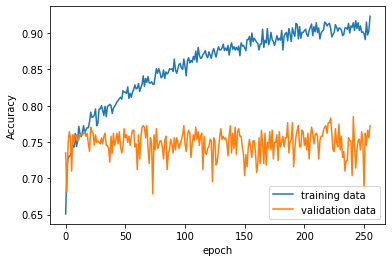

In [ ]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

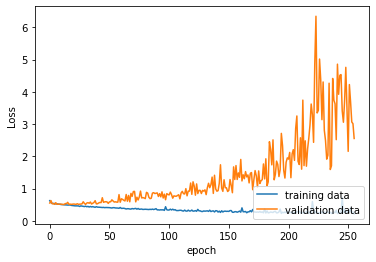

In [ ]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
P3 = model_3.predict(XTRAIN)
accuracy_train = model_3.evaluate(XTRAIN, YTRAIN)

print(accuracy_train)


35/35 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9330
[0.15766297280788422, 0.9330357313156128]


In [ ]:
P3 = model_3.predict(XVALID)
accuracy_valid = model_3.evaluate(XVALID, YVALID)

print(accuracy_valid)

15/15 [==============================] - 0s 1ms/step - loss: 2.5533 - accuracy: 0.7724
[2.553287982940674, 0.7724425792694092]


In [ ]:
model_4 = Sequential()
model_4.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='linear'))
model_4.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
history_4 = model_4.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 100, batch_size=10)

Epoch 1/100
112/112 [==============================] - 1s 3ms/step - loss: 3.9768 - accuracy: 0.4674 - val_loss: 2.9563 - val_accuracy: 0.4551
Epoch 2/100
112/112 [==============================] - 0s 2ms/step - loss: 2.1341 - accuracy: 0.4959 - val_loss: 1.5512 - val_accuracy: 0.4489
Epoch 3/100
112/112 [==============================] - 0s 2ms/step - loss: 1.3779 - accuracy: 0.4953 - val_loss: 1.3574 - val_accuracy: 0.4572
Epoch 4/100
112/112 [==============================] - 0s 2ms/step - loss: 1.2580 - accuracy: 0.5109 - val_loss: 1.2323 - val_accuracy: 0.4718
Epoch 5/100
112/112 [==============================] - 0s 2ms/step - loss: 1.0804 - accuracy: 0.4950 - val_loss: 1.1738 - val_accuracy: 0.4676
Epoch 6/100
112/112 [==============================] - 0s 2ms/step - loss: 1.0455 - accuracy: 0.5321 - val_loss: 1.1013 - val_accuracy: 0.4885
Epoch 7/100
112/112 [==============================] - 0s 2ms/step - loss: 1.0139 - accuracy: 0.5239 - val_loss: 1.0484 - val_accuracy: 0.4885

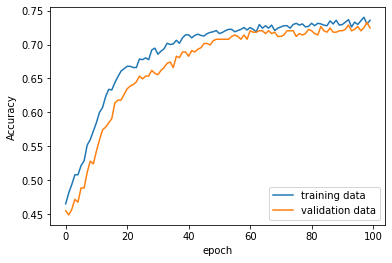

In [ ]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

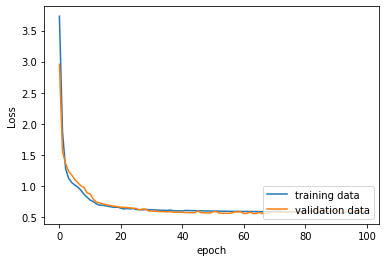

In [ ]:
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
P4 = model_4.predict(XTRAIN)
accuracy_train = model_4.evaluate(XTRAIN, YTRAIN)
 
print(accuracy_train)
 
 
P4 = model_4.predict(XVALID)
accuracy_valid = model_4.evaluate(XVALID, YVALID)
 
print(accuracy_valid)

35/35 [==============================] - 0s 1ms/step - loss: 0.5557 - accuracy: 0.7491
[0.5557336211204529, 0.7491071224212646]
15/15 [==============================] - 0s 1ms/step - loss: 0.5117 - accuracy: 0.7474
[0.5117309093475342, 0.7473903894424438]


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
callback_a = ModelCheckpoint(filepath = "model_5.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=1)

In [ ]:
model_5 = Sequential()
model_5.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model_5.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
history_5 = model_5.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=1000, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/1000
112/112 [==============================] - 1s 3ms/step - loss: 0.6962 - accuracy: 0.4830 - val_loss: 0.6935 - val_accuracy: 0.4802

Epoch 00001: val_loss improved from inf to 0.69353, saving model to model_5.hdf5
Epoch 2/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5568 - val_loss: 0.6890 - val_accuracy: 0.5219

Epoch 00002: val_loss improved from 0.69353 to 0.68901, saving model to model_5.hdf5
Epoch 3/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5740 - val_loss: 0.6841 - val_accuracy: 0.5491

Epoch 00003: val_loss improved from 0.68901 to 0.68412, saving model to model_5.hdf5
Epoch 4/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5488 - val_loss: 0.6798 - val_accuracy: 0.5511

Epoch 00004: val_loss improved from 0.68412 to 0.67984, saving model to model_5.hdf5
Epoch 5/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.6734 -

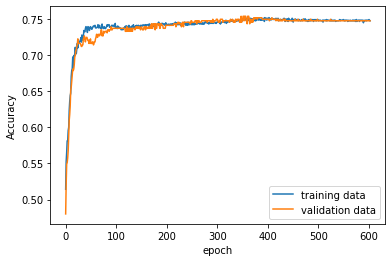

In [ ]:
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

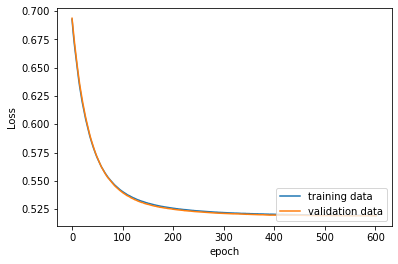

In [ ]:
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
model_5.load_weights('model_5.hdf5')

In [ ]:
P5 = model_5.predict(XTRAIN)
accuracy_train5 = model_5.evaluate(XTRAIN, YTRAIN)
 
print(accuracy_train5)
 
 
P6 = model_5.predict(XVALID)
accuracy_valid5 = model_5.evaluate(XVALID, YVALID)
 
print(accuracy_valid5)

35/35 [==============================] - 0s 1ms/step - loss: 0.5193 - accuracy: 0.7482
[0.5193459391593933, 0.7482143044471741]
15/15 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.7474
[0.5190311074256897, 0.7473903894424438]


In [ ]:
mae(accuracy_train5, accuracy_valid5)

0.0005693733692169189

In [ ]:
prediction = model_5.predict(XTRAIN)
new_accuracy = accuracy_score(YTRAIN, prediction.round())
new_precision = precision_score(YTRAIN, prediction.round())
new_recall = recall_score(YTRAIN, prediction.round())
new_f1 = f1_score(YTRAIN, prediction.round())

In [ ]:
print(new_precision)
print(new_recall)
print(new_f1)
print(new_accuracy)

0.7728813559322034
0.7549668874172185
0.7638190954773869
0.7482142857142857


In [ ]:
model_6 = Sequential()
model_6.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model_6.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
history_6 = model_6.fit(XTRAIN, YTRAIN, epochs=64, batch_size=10)

Epoch 1/64
112/112 [==============================] - 0s 905us/step - loss: 0.7281 - accuracy: 0.4466
Epoch 2/64
112/112 [==============================] - 0s 865us/step - loss: 0.7140 - accuracy: 0.4866
Epoch 3/64
112/112 [==============================] - 0s 930us/step - loss: 0.7075 - accuracy: 0.5168
Epoch 4/64
112/112 [==============================] - 0s 1ms/step - loss: 0.7029 - accuracy: 0.5201
Epoch 5/64
112/112 [==============================] - 0s 1ms/step - loss: 0.6983 - accuracy: 0.5430
Epoch 6/64
112/112 [==============================] - 0s 993us/step - loss: 0.6937 - accuracy: 0.5420
Epoch 7/64
112/112 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.5536
Epoch 8/64
112/112 [==============================] - 0s 1ms/step - loss: 0.6821 - accuracy: 0.5799
Epoch 9/64
112/112 [==============================] - 0s 1ms/step - loss: 0.6751 - accuracy: 0.5885
Epoch 10/64
112/112 [==============================] - 0s 1000us/step - loss: 0.6789 - accur

In [ ]:
# weights-Calculated 
print('Model weights - w0(slope m), bias):')
w0 = model_6.layers[0].get_weights()[0][0]
w1 = model_6.layers[0].get_weights()[0][1]
w2 = model_6.layers[0].get_weights()[0][2]
w3 = model_6.layers[0].get_weights()[0][3]
w4 = model_6.layers[0].get_weights()[0][4]
w5 = model_6.layers[0].get_weights()[0][5]
w6 = model_6.layers[0].get_weights()[0][6]
w7 = model_6.layers[0].get_weights()[0][7]
w8 = model_6.layers[0].get_weights()[0][8]
w9 = model_6.layers[0].get_weights()[0][9]
w10 = model_6.layers[0].get_weights()[0][10]
b0 = model_6.layers[0].get_weights()[1]

print(w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10)
print(b0)

Model weights - w0(slope m), bias):
[ 0.08] [-1.96] [ 0.84] [-0.06] [-1.33] [-0.51] [-1.60] [-0.36] [ 0.52] [ 1.50] [ 2.63]
[-0.17]


In [ ]:
prediction = model_6.predict(XTRAIN)

print(YTRAIN[:5])
print(prediction[:5].T)

[ 1.00  1.00  0.00  1.00  0.00]
[[ 0.46  0.88  0.36  0.40  0.62]]


In [ ]:
import math

def sigmoid(s):
  return 1/(1+math.exp(-s))

In [ ]:
Z = (w0*XTRAIN[:, 0]+w1*XTRAIN[:, 1]+w2*XTRAIN[:, 2]+w3*XTRAIN[:, 3]+w4*XTRAIN[:, 4]+w5*XTRAIN[:, 5]+w6*XTRAIN[:, 6]+w7*XTRAIN[:, 7]+w8*XTRAIN[:, 8]+w9*XTRAIN[:, 9]+w10*XTRAIN[:, 10])+b0

In [ ]:
print(Z[:5].T)

[-0.15  1.96 -0.56 -0.42  0.50]


In [ ]:
print(sigmoid(Z[1]))

0.8768293398952487


In [ ]:
print(len(XTRAIN[:,0]))

1120


In [ ]:
val=[]
def custom_fun():
  for j in range(len(XTRAIN[:,0])):
    val.append(sigmoid(Z[j]))
custom_fun()

valu = [ '%.2f' % elem for elem in val ]
print(valu[:5])

['0.46', '0.88', '0.36', '0.40', '0.62']


In [ ]:
# output as input parameter

In [ ]:
import numpy as np
dataset1 = np.genfromtxt('winequality-red0.csv', delimiter = ',', skip_header = True)

In [ ]:
A = dataset1[:, ]
B = dataset1[:,-1]

In [ ]:
print(A.shape , B.shape)

(1599, 12) (1599,)


In [ ]:
min = A.min(axis = 0) 
max = A.max(axis = 0) 
A = (A - min) / (max - min)

In [ ]:
import random
np.random.shuffle(A)

In [ ]:
index_30percent = int(0.3 * len(X[:, 0]))
print(index_30percent)
AVALID = A[:index_30percent, ]
BVALID = A[:index_30percent, -1]
ATRAIN = A[index_30percent:, ]
BTRAIN = A[index_30percent:, -1]

479


In [ ]:
print(ATRAIN.shape , BVALID.shape)

(1120, 12) (479,)


In [ ]:
print(ATRAIN)

[[ 0.60  0.16  0.69 ...  0.17  0.12  1.00]
 [ 0.27  0.43  0.27 ...  0.07  0.14  0.00]
 [ 0.25  0.29  0.19 ...  0.21  0.32  0.00]
 ...
 [ 0.25  0.27  0.13 ...  0.16  0.37  1.00]
 [ 0.47  0.22  0.46 ...  0.22  0.54  1.00]
 [ 0.15  0.59  0.01 ...  0.08  0.43  1.00]]


In [ ]:
model_o = Sequential()
model_o.add(Dense(1, input_dim = len(ATRAIN[0, :]), activation='sigmoid'))
model_o.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
history_o = model_o.fit(ATRAIN, BTRAIN, validation_data=(AVALID, BVALID), epochs = 300, batch_size=10)

Epoch 1/300
112/112 [==============================] - 1s 3ms/step - loss: 0.8556 - accuracy: 0.1507 - val_loss: 0.8128 - val_accuracy: 0.1503
Epoch 2/300
112/112 [==============================] - 0s 2ms/step - loss: 0.8143 - accuracy: 0.1629 - val_loss: 0.7748 - val_accuracy: 0.2944
Epoch 3/300
112/112 [==============================] - 0s 2ms/step - loss: 0.7813 - accuracy: 0.2704 - val_loss: 0.7416 - val_accuracy: 0.3946
Epoch 4/300
112/112 [==============================] - 0s 2ms/step - loss: 0.7474 - accuracy: 0.4049 - val_loss: 0.7097 - val_accuracy: 0.4885
Epoch 5/300
112/112 [==============================] - 0s 2ms/step - loss: 0.7051 - accuracy: 0.4996 - val_loss: 0.6792 - val_accuracy: 0.5595
Epoch 6/300
112/112 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5364 - val_loss: 0.6499 - val_accuracy: 0.6305
Epoch 7/300
112/112 [==============================] - 0s 2ms/step - loss: 0.6490 - accuracy: 0.6238 - val_loss: 0.6221 - val_accuracy: 0.6994

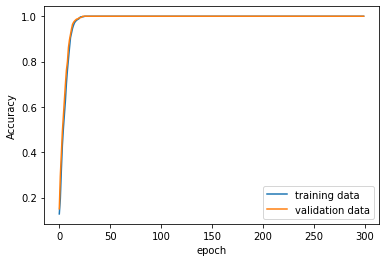

In [ ]:
plt.plot(history_o.history['accuracy'])
plt.plot(history_o.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

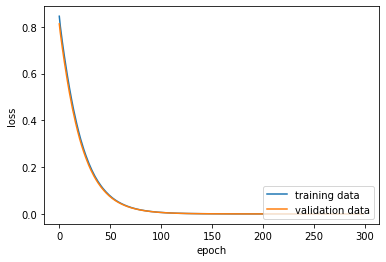

In [ ]:
plt.plot(history_o.history['loss'])
plt.plot(history_o.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()